# EcoFOCIpy ADCP Tidal Verification - 21BSP-2A


In [1]:
from utide import solve, reconstruct

import xarray as xa
import pandas as pd
import numpy as np

/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/utide/harmonics.py:16: RuntimeWarning: invalid value encountered in cast
  nshallow = np.ma.masked_invalid(const.nshallow).astype(int)
/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/utide/harmonics.py:17: RuntimeWarning: invalid value encountered in cast
  ishallow = np.ma.masked_invalid(const.ishallow).astype(int) - 1


In [2]:
xdf = xa.load_dataset('21bsp2a_0058m.filtered.nc')

In [3]:
kw = dict(lat=xdf.latitude.values, constit='auto', trend=False, method='ols', Rayleigh_min=0.95,)

depth_index=-1
u = xdf.u_curr_comp.isel({'latitude':0,'longitude':0,'depth':depth_index})
v = xdf.v_curr_comp.isel({'latitude':0,'longitude':0,'depth':depth_index})

coef = solve(xdf.time.values, u.values, v.values, **kw)

solve: matrix prep ... solution ... done.


In [4]:
df = pd.DataFrame(index=coef['name'],
             data=np.array([coef['Lsmaj'],coef['Lsmin'],coef['g'],coef['theta']]).T,
            columns=['Lsmaj','Lsmin','g','theta'])

In [5]:
df

,Lsmaj,Lsmin,g,theta
M2,19.638061,-11.286917,124.040235,19.985281
K1,13.398541,0.394566,313.260262,7.291595
O1,8.274285,0.261734,292.429077,7.817946
N2,6.364851,-3.352085,74.657740,15.347280
P1,4.396891,0.087838,309.065198,5.065337
NU2,1.649304,-1.080945,89.778570,15.730075
Q1,1.560960,0.098180,287.220808,7.646637
MM,1.313483,-0.151793,117.510009,102.526850
MSM,0.976675,-0.535167,150.395142,100.996263
2N2,1.035738,-0.404470,14.590096,1.357672


In [6]:
df[df.index == 'M2']

,Lsmaj,Lsmin,g,theta
M2,19.638061,-11.286917,124.040235,19.985281


In [7]:
MM = df[df.index == 'M2']
SEMA, SEMI = MM['Lsmaj'], MM['Lsmin']
PHA, INC = MM['g'], MM['theta']
ECC = SEMI / SEMA 

In [8]:
import matplotlib.pyplot as plt


In [9]:
SEMA, ECC, INC, PHA = (SEMA.values, ECC.values, INC.values, PHA.values)

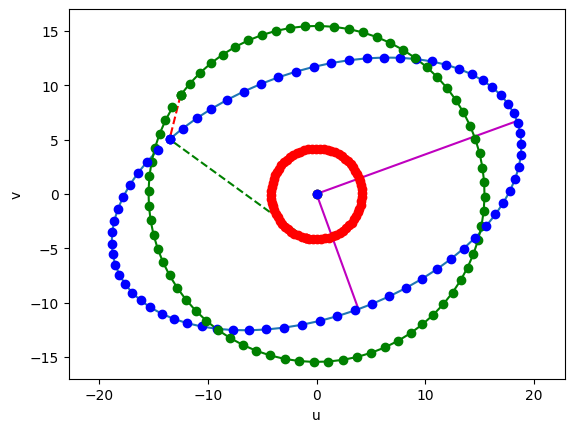

In [10]:
"""
Ellipse plot subfunction.

Converted to Python by Pierre Cazenave, October 2012.

"""

i = 1j

SEMI = SEMA * ECC
Wp = (1 + ECC) / 2 * SEMA
Wm = (1 - ECC) / 2 * SEMA
THETAp = INC - PHA
THETAm = INC + PHA

# Convert degrees into radians
THETAp = THETAp / 180 * np.pi
THETAm = THETAm / 180 * np.pi
INC = INC / 180 * np.pi
PHA = PHA / 180 * np.pi

# Calculate wp and wm.
wp = Wp * np.exp(i * THETAp)
wm = Wm * np.exp(i * THETAm)

dot = np.pi / 36
ot = np.arange(0, 2 * np.pi, dot)
a = wp * np.exp(i * ot)
b = wm * np.exp(-i * ot)
w = a + b

wmax = SEMA * np.exp(i * INC)
wmin = SEMI * np.exp(i * (INC + np.pi / 2))

plt.plot(np.real(w), np.imag(w))
plt.axis('equal')
# plt.hold('on')
plt.plot([0, np.real(wmax)[0]], [0, np.imag(wmax)[0]], 'm')
plt.plot([0, np.real(wmin)[0]], [0, np.imag(wmin)[0]], 'm')
plt.xlabel('u')
plt.ylabel('v')
plt.plot(np.real(a), np.imag(a), 'r')
plt.plot(np.real(b), np.imag(b), 'g')
plt.plot([0, np.real(a[0])], [0, np.imag(a[0])], 'ro')
plt.plot([0, np.real(b[0])], [0, np.imag(b[0])], 'go')
plt.plot([0, np.real(w[0])], [0, np.imag(w[0])], 'bo')
plt.plot(np.real(a[0]), np.imag(a[0]), 'ro')
plt.plot(np.real(b[0]), np.imag(b[0]), 'go')
plt.plot(np.real(w[0]), np.imag(w[0]), 'bo')
plt.plot(np.real([a[0], a[0]+b[0]]), np.imag([a[0], a[0]+b[0]]), linestyle='--', color='g')
plt.plot(np.real([b[0], a[0]+b[0]]), np.imag([b[0], a[0]+b[0]]), linestyle='--', color='r')

for n in range(len(ot)):
    # plt.hold('on')
    plt.plot(np.real(a[n]), np.imag(a[n]), 'ro')
    plt.plot(np.real(b[n]), np.imag(b[n]), 'go')
    plt.plot(np.real(w[n]), np.imag(w[n]), 'bo')

# plt.hold('off')
plt.show()

In [11]:
#refernce tidal loop - 2019

bxdf = xa.load_dataset('/Users/bell/ecoraid/2019/Moorings/19bsp2a/final_data_cf/19bsp2a_velein_0055m.nc')
bxdf =bxdf.where(bxdf.u_curr_comp <=100000,np.nan)

kw = dict(lat=xdf.latitude.values, constit='auto', trend=False, method='ols', Rayleigh_min=0.95,)

# should use 3rd bin from top and 2nd bin from bottom
try:
    u = bxdf.u_curr_comp.isel({'latitude':0,'longitude':0}).mean(dim='depth')
    v = bxdf.v_curr_comp.isel({'latitude':0,'longitude':0}).mean(dim='depth')
except:
    u = bxdf.u_1205.isel({'lat':0,'lon':0}).mean(dim='depth')
    v = bxdf.v_1206.isel({'lat':0,'lon':0}).mean(dim='depth')   
coef = solve(bxdf.time.values, u.values, v.values, **kw)

bdf = pd.DataFrame(index=coef['name'],
             data=np.array([coef['Lsmaj'],coef['Lsmin'],coef['g'],coef['theta']]).T,
            columns=['Lsmaj','Lsmin','g','theta'])

bMM = bdf.loc[['M2']]
bSEMA, bSEMI = bMM['Lsmaj'], bMM['Lsmin']
bPHA, bINC = bMM['g'], bMM['theta']
bECC = bSEMI / bSEMA 

solve: matrix prep ... solution ... done.


<module 'matplotlib.pyplot' from '/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/matplotlib/pyplot.py'>

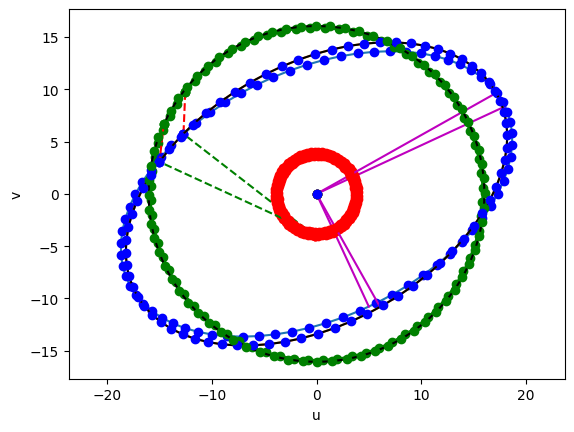

In [12]:
plot_ellipse(SEMA.values, ECC.values, INC.values, PHA.values)
plot_ellipse(bSEMA.values, bECC.values, bINC.values, bPHA.values,'k')